In [8]:
from PIL import Image
import pandas as pd
import numpy as np
# Open the image
image = Image.open('bird_small.png')

# Convert the image into a numpy array
image_array = np.array(image)

# Convert the numpy array into a dataframe
df = pd.DataFrame(image_array.reshape(-1, image_array.shape[-1]))
df


array([[[219, 180, 103],
        [230, 185, 116],
        [226, 186, 110],
        ...,
        [ 14,  15,  13],
        [ 13,  15,  12],
        [ 12,  14,  12]],

       [[230, 193, 119],
        [224, 192, 120],
        [226, 192, 124],
        ...,
        [ 16,  16,  13],
        [ 14,  15,  10],
        [ 11,  14,   9]],

       [[228, 191, 123],
        [228, 191, 121],
        [220, 185, 118],
        ...,
        [ 14,  16,  13],
        [ 13,  13,  11],
        [ 11,  15,  10]],

       ...,

       [[ 15,  18,  16],
        [ 18,  21,  18],
        [ 18,  19,  16],
        ...,
        [ 81,  45,  45],
        [ 70,  43,  35],
        [ 72,  51,  43]],

       [[ 16,  17,  17],
        [ 17,  18,  19],
        [ 20,  19,  20],
        ...,
        [ 80,  38,  40],
        [ 68,  39,  40],
        [ 59,  43,  42]],

       [[ 15,  19,  19],
        [ 20,  20,  18],
        [ 18,  19,  17],
        ...,
        [ 65,  43,  39],
        [ 58,  37,  38],
        [ 52,  39,  34]]

In [6]:
# choix aleatoirement de 16 points entre 0 et 255
points_size = np.random.randint(0,255,size=[16,3])
points_size


array([[ 26,  45, 110],
       [ 29, 223,  56],
       [240, 254, 163],
       [ 82,  73,  84],
       [ 87,  44, 204],
       [217, 217, 133],
       [150, 185,  31],
       [ 13, 182, 231],
       [219, 161,  58],
       [ 86, 145, 211],
       [106, 122,  81],
       [  7, 217,  52],
       [222, 221,  45],
       [189, 191,  90],
       [174, 148, 216],
       [170,   8, 154]])

c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


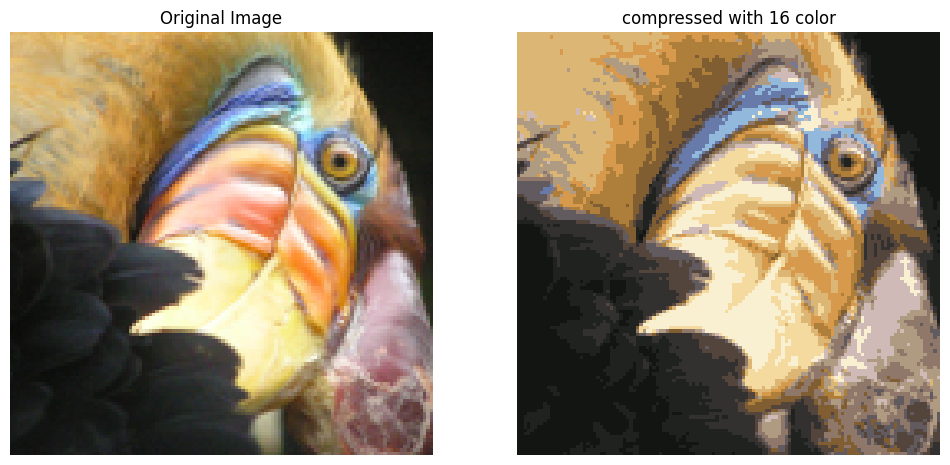

In [21]:
from sklearn.cluster import KMeans

# Initialize K-means algorithm with k=16 clusters and use the random points as initial cluster centers
kmeans = KMeans(n_clusters=16, init=points_size)

# Apply K-means to the image data
kmeans.fit(df)

# Get the labels assigned to each pixel in the image
labels = kmeans.predict(df)

# Reshape the labels back into the original image shape
 
labels = labels.reshape(image_array.shape[:2])
 
# Visualize the segmented image using the labels and the cluster centers
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image_array)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(kmeans.cluster_centers_.astype(int)[labels])
ax[1].set_title('compressed with 16 color')
ax[1].axis('off')
plt.show()
